# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Ankita Gupta


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Project Summary -**

Netflix, the world's largest on-demand internet streaming media and online DVD movie rental service provider. It was founded by Marc Randolph and Reed Hastings on August 29, 1997, in Scotts Valley, California. It has 220 million members in over 60 countries enjoying more than 100 million hours of TV shows and movies per day, Netflix is the world's leading internet entertainment service with enjoying TV series, documentaries, and feature films across a wide variety of genres and languages. I was curious to analyze the content released in Netflix platform which led me to create these simple, interactive and exciting visualization and find similar gropus of people.

This dataset consist of TV shows and movies available on Netflix as of 2019.The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018 they released an inetresting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The straming service's number of movies has decreased by more than 2,000 title since 2010, while its number of TV shows has nearly tripled.
It will be inetresting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many inetresting findings.

# **GitHub Link -**

https://github.com/ankitagupta010/Netflix_and_TV_show_clustering

# **Problem Statement**


The dataset consists of TV shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. Our objective is to conduct an Exploratory Data Analysis to understand what content is available in different countries and if Netflix has been increasingly focusing on TV rather than movies in recent year. And use these insights to cluster similar content by matching text-based features.

# **Dataset Description**



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
import datetime
from datetime import datetime, timedelta

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download ('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

import time
from time import sleep
#import tensorflow as tf

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [3]:
#connect to Google drive
from google.colab import drive
drive.mount('/content/DRIVE')

Mounted at /content/DRIVE


In [4]:
# Load Dataset
NF= ('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
NF_df = pd.read_csv(NF)

### Dataset First View

In [5]:
# Dataset First Look
NF_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Last View

In [6]:
# Dataset Last Look
NF_df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
NF_df.shape

(7787, 12)

### Dataset Information

In [8]:
# Dataset Info
NF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
NF_df[NF_df.duplicated()]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

In this dataset there are no duplicate values.

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
NF_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
df = pd.DataFrame(NF_df)

In [12]:
df.nunique()


show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

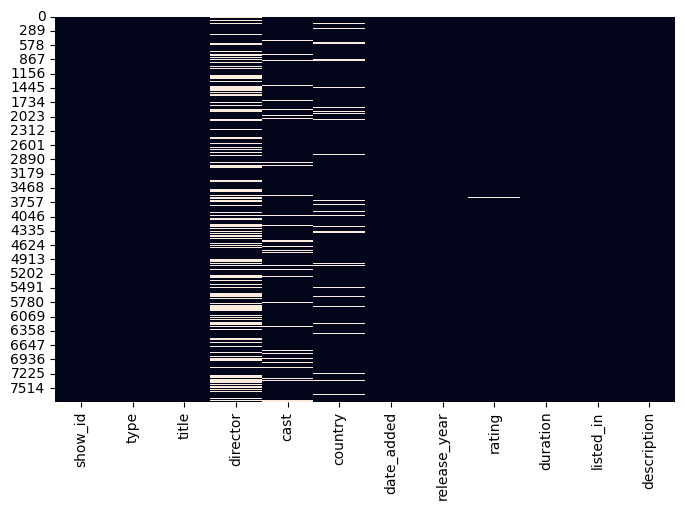

In [13]:
# Visualizing the missing values
plt.figure(figsize=(8,5))
sns.heatmap(NF_df.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

In this Dataset there are null value columns:

**director**=2389

**cast**=718

**country**=507

**date_added**=10



## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
# Dataset Describe
df.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description

**1.show_id:** Unique ID for every Movie/TV show

**2.type:**Identifier-A Movie or TV show

**3.title:**Title of the movie or TV show

**4.director:**Director of the movie

**5.cast:**Actors involved in the movie or show

**6.country:**Country where the movie or show produced

**7.date_added:**Date it was added on Netflix

**8.release_year:**Actual release year of movie or show

**9.rating:**TV rating of movie or show

**10.duration:**Total duration-in minutes or number of seasons

**11.listed_in:**Genre

**12.description:**The summary description


### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
 print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


In [17]:
#total null values
df.isnull().sum().sum()

3631

In [18]:
# handling the missing values
df[['director','cast','country']]=df[['director','cast','country']].fillna('Unknown')
df['rating']=df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace= True)

In [19]:
#rechecking the null values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [20]:
# Dataset Rows and Columns count
df.shape

(7777, 12)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***Feature Engineering***

In [22]:
#top countries
df.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [23]:
#Genre of shows
df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [24]:
# choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [25]:
#country in which movie was produced
df.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [26]:
# genre of shows
df.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

In [27]:
# splitting the duration column, and changing the datatype to integer

df['duration'] =df['duration'].astype(str).str.split()

In [28]:
df[df['type']=='TV Show'].duration.value_counts()

[1, Season]      1608
[2, Seasons]      378
[3, Seasons]      183
[4, Seasons]       86
[5, Seasons]       57
[6, Seasons]       30
[7, Seasons]       19
[8, Seasons]       18
[9, Seasons]        8
[10, Seasons]       5
[11, Seasons]       2
[12, Seasons]       2
[15, Seasons]       2
[13, Seasons]       1
[16, Seasons]       1
Name: duration, dtype: int64

In [29]:
NF_df.nunique()

show_id         7787
type               2
title           7787
director        4050
cast            6832
country          682
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [30]:
NF_df[NF_df['type']=='Movie'].duration.unique()


array(['93 min', '78 min', '80 min', '123 min', '95 min', '119 min',
       '118 min', '143 min', '103 min', '89 min', '91 min', '149 min',
       '144 min', '124 min', '87 min', '110 min', '128 min', '117 min',
       '100 min', '84 min', '99 min', '90 min', '102 min', '104 min',
       '105 min', '56 min', '125 min', '81 min', '97 min', '106 min',
       '107 min', '109 min', '44 min', '75 min', '101 min', '37 min',
       '113 min', '114 min', '130 min', '94 min', '140 min', '135 min',
       '82 min', '70 min', '121 min', '92 min', '164 min', '53 min',
       '83 min', '116 min', '86 min', '120 min', '96 min', '126 min',
       '129 min', '77 min', '137 min', '148 min', '28 min', '122 min',
       '176 min', '85 min', '22 min', '68 min', '111 min', '29 min',
       '142 min', '168 min', '21 min', '59 min', '20 min', '98 min',
       '108 min', '76 min', '26 min', '156 min', '30 min', '57 min',
       '150 min', '133 min', '115 min', '154 min', '127 min', '146 min',
       '136 min'

In [31]:
NF_df.duration.dtype

dtype('O')

## ***Date_added column string to Datetime format***

In [32]:
# typecasting 'date_added' from string to datetime
df['date_added']= pd.to_datetime(df['date_added'])


In [33]:
df['date_added']= pd.to_datetime(df['date_added'], errors='coerce')

In [34]:
# First and last date on which a show was added on Netflix
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

In [35]:
# Adding new attributes month and year of date added
df['month_added'] = df['date_added'].dt.month
df['year_added']=df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

In [36]:
# Dataset rows and columns count
df.shape

(7777, 13)

In [37]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   release_year  7777 non-null   int64 
 7   rating        7777 non-null   object
 8   duration      7777 non-null   object
 9   listed_in     7777 non-null   object
 10  description   7777 non-null   object
 11  month_added   7777 non-null   int64 
 12  year_added    7777 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 850.6+ KB


### **EDA**

In [38]:
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

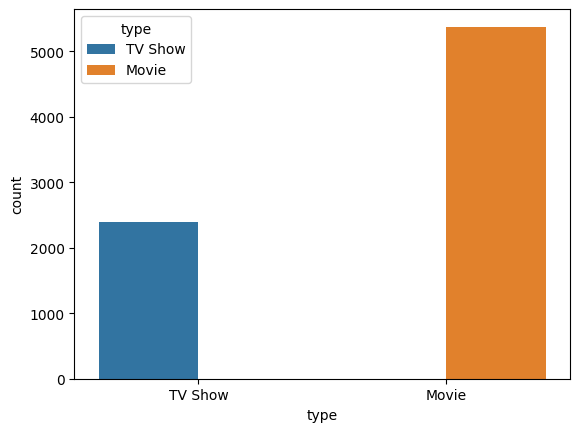

In [39]:
sns.countplot(x='type',data=df, hue='type')


Netflix has 5377 movies and 2400 TV shows, there are more number movies on Netflix than TV shows.

<Axes: xlabel='rating', ylabel='count'>

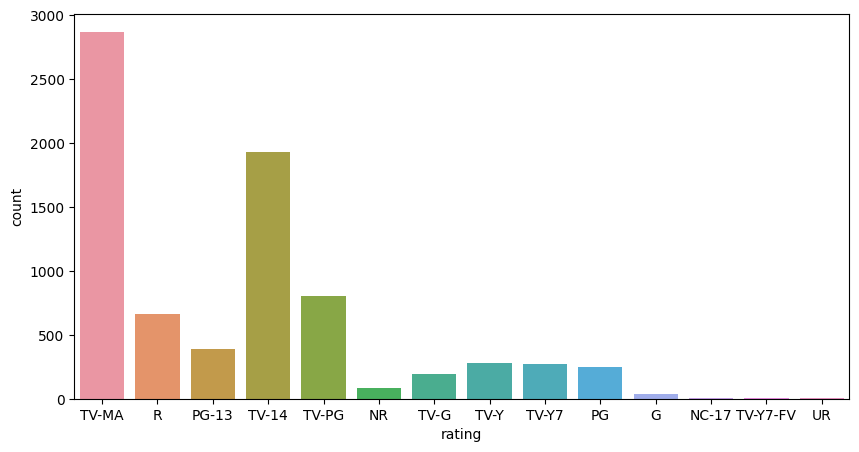

In [40]:
#Movie Ratings based on Target Age Groups
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

In [41]:
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [42]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

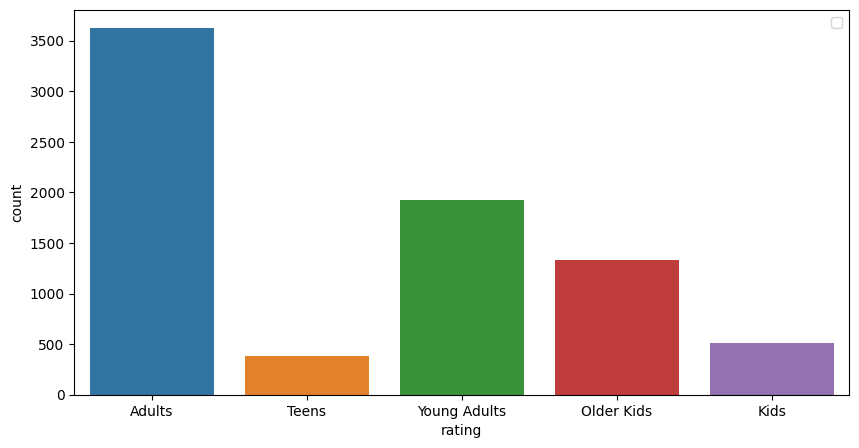

In [43]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)
plt.legend()

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

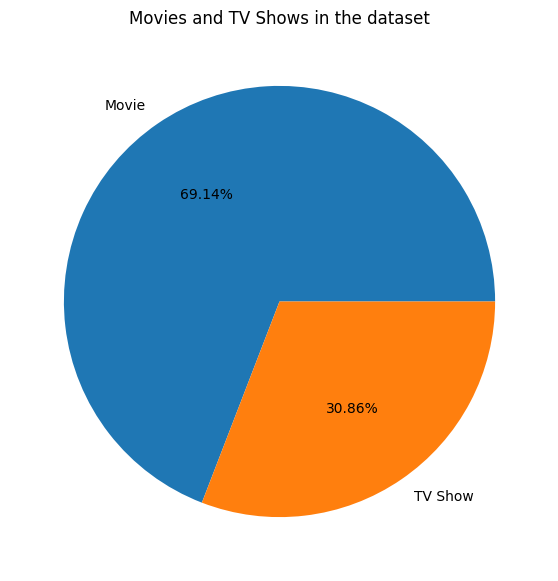

In [44]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

##### 1. Why did you pick the specific chart?

A pie chart is a way of summarizing a set of nominal data or displaying the different values of a given variable.

##### 2. What is/are the insight(s) found from the chart?

In this chart there are more Movies(69.14%),than the TV shows(30.86%).

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

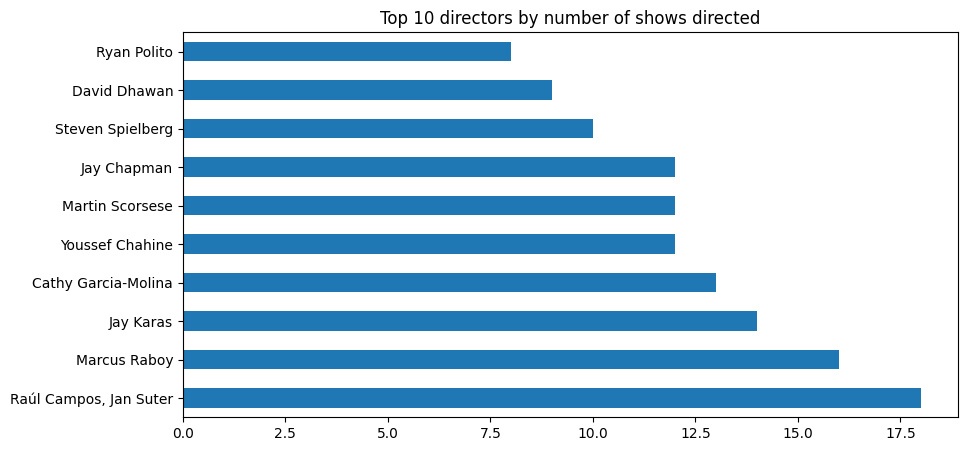

In [45]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

##### 1. Why did you pick the specific chart?

A bar graph is also known as a bar chart and is used to visually represent the discrete set of data.

##### 2. What is/are the insight(s) found from the chart?

Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

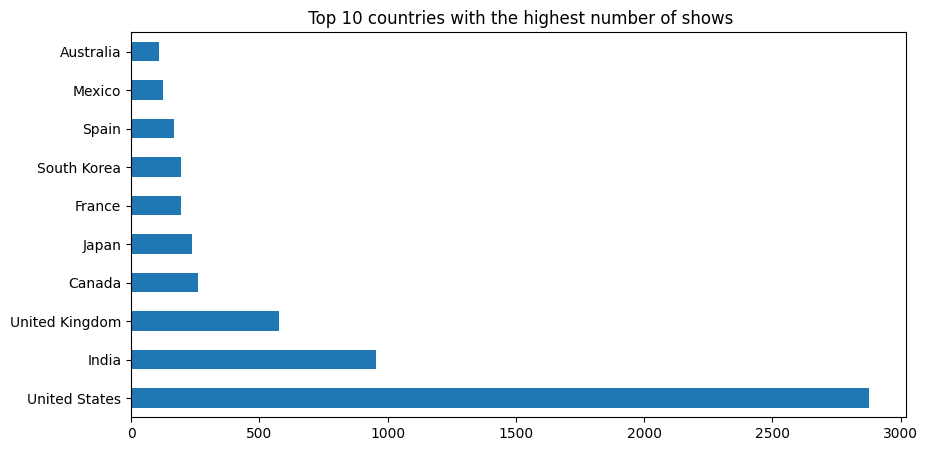

In [46]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

##### 1. Why did you pick the specific chart?

A bar graph is also known as a bar chart and is used to visually represent the discrete set of data.

##### 2. What is/are the insight(s) found from the chart?

The highest number of movies / TV shows were based out of the US, followed by India and UK.

In [47]:
# % share of movies / TV shows by top 3 countries
df.country.value_counts().nlargest(3).sum()/len(df)*100

56.69281213835669

In [48]:
# % share of movies / TV shows by top 10 countries
df.country.value_counts().nlargest(10).sum()/len(df)*100

78.32068921177832

* The top 3 countries together account for about for about 56% of all movies and TV shows in the dataset.

* This value increases to about 78% of top 10 countries.



Text(0.5, 1.0, 'distribution by released year')

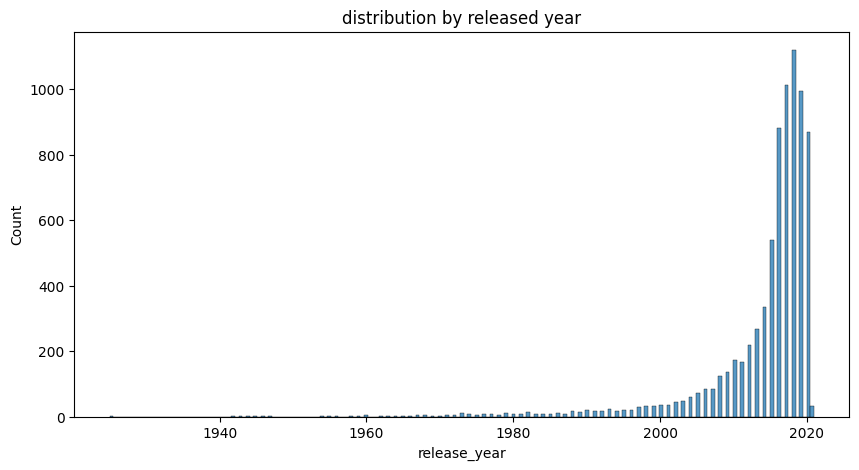

In [49]:
#Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

##### 1. Why did you pick the specific chart?

Histograms can display a large amount of data and the frequency of the data values.

##### 2. What is/are the insight(s) found from the chart?

Netflix has greater number of new released movies / TV shows than the old ones.

In [50]:
# % of tv shows with just 1 season
len(df[(df['type']=='TV Show') & (df['duration']==1)]) / len(df[df['type']=='TV Show'])* 100

0.0

In [51]:
df['duration'].value_counts()

[1, Season]     1608
[2, Seasons]     378
[3, Seasons]     183
[90, min]        136
[93, min]        131
                ... 
[9, min]           1
[182, min]         1
[224, min]         1
[233, min]         1
[191, min]         1
Name: duration, Length: 216, dtype: int64

In [52]:
df_movies = df[df['type']=='Movie']
df_movies

show_id   type                                    title  \
1         s2  Movie                                     7:19   
2         s3  Movie                                    23:59   
3         s4  Movie                                        9   
4         s5  Movie                                       21   
6         s7  Movie                                      122   
...      ...    ...                                      ...   
7781   s7782  Movie                                     Zoom   
7782   s7783  Movie                                     Zozo   
7783   s7784  Movie                                   Zubaan   
7784   s7785  Movie                        Zulu Man in Japan   
7786   s7787  Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
6       Yasir Al Yasiri  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   
...                 ...                                                ...   
7781       Peter Hewitt  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784            Unknown                                            Nasty C   
7786           Sam Dunn                                            Unknown   

             country  release_year        rating    duration  \
1             Mexico          2016        Adults   [93, min]   
2          Singapore          2011        Adults   [78, min]   
3      United States          2009         Teens   [80, min]   
4      United States          2008         Teens  [123, min]   
6              Egypt          2019        Adults   [95, min]   
...              ...           ...           ...         ...   
7781   United States          2006    Older Kids   [88, min]   
7782          Sweden          2005        Adults   [99, min]   
7783           India          2015  Young Adults  [111, min]   
7784         Unknown          2019        Adults   [44, min]   
7786  United Kingdom          2019        Adults   [90, min]   

                     listed_in  \
1                       Dramas   
2                Horror Movies   
3           Action & Adventure   
4                       Dramas   
6                Horror Movies   
...                        ...   
7781  Children & Family Movies   
7782                    Dramas   
7783                    Dramas   
7784             Documentaries   
7786             Documentaries   

                                            description  month_added  \
1     After a devastating earthquake hits Mexico Cit...           12   
2     When an army recruit is found dead, his fellow...           12   
3     In a postapocalyptic world, rag-doll robots hi...           11   
4     A brilliant group of students become card-coun...            1   
6     After an awful accident, a couple admitted to ...            6   
...                                                 ...          ...   
7781  Dragged from civilian life, a former superhero...            1   
7782  When Lebanon's Civil War deprives Zozo of his ...           10   
7783  A scrappy but poor boy worms his way into a ty...            3   
7784  In this documentary, South African rapper Nast...            9   
7786  This documentary delves into the mystique behi...            3   

      year_added  
1           2016  
2           2018  
3           2017  
4           2020  
6           2020  
...          ...  
7781        2020  
7782        2020  
7783        2019  
7784        2020  
7786        2020  

[5377 rows x 13 columns]

In [53]:
df_movies['duration'] = df_movies['duration'].astype(str)

In [54]:
df_movies['duration'] = df_movies['duration'].str.replace(r'\D', '', regex=True).astype(int)
df_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

In [55]:
df_movies['duration'].describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

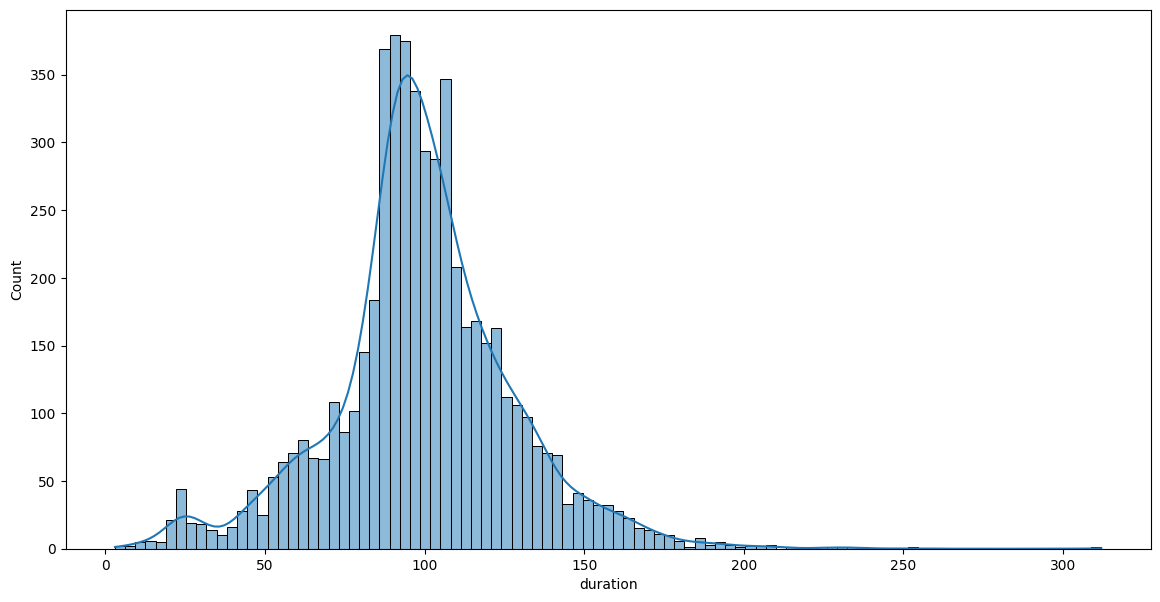

In [56]:
plt.figure(figsize=(14,7))
sns.histplot(x=df_movies['duration'],kde=True)
plt.show()

##### 1. Why did you pick the specific chart?

The histplot method helps to visualize dataset distributions.

##### 2. What is/are the insight(s) found from the chart?

The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.

In [57]:
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

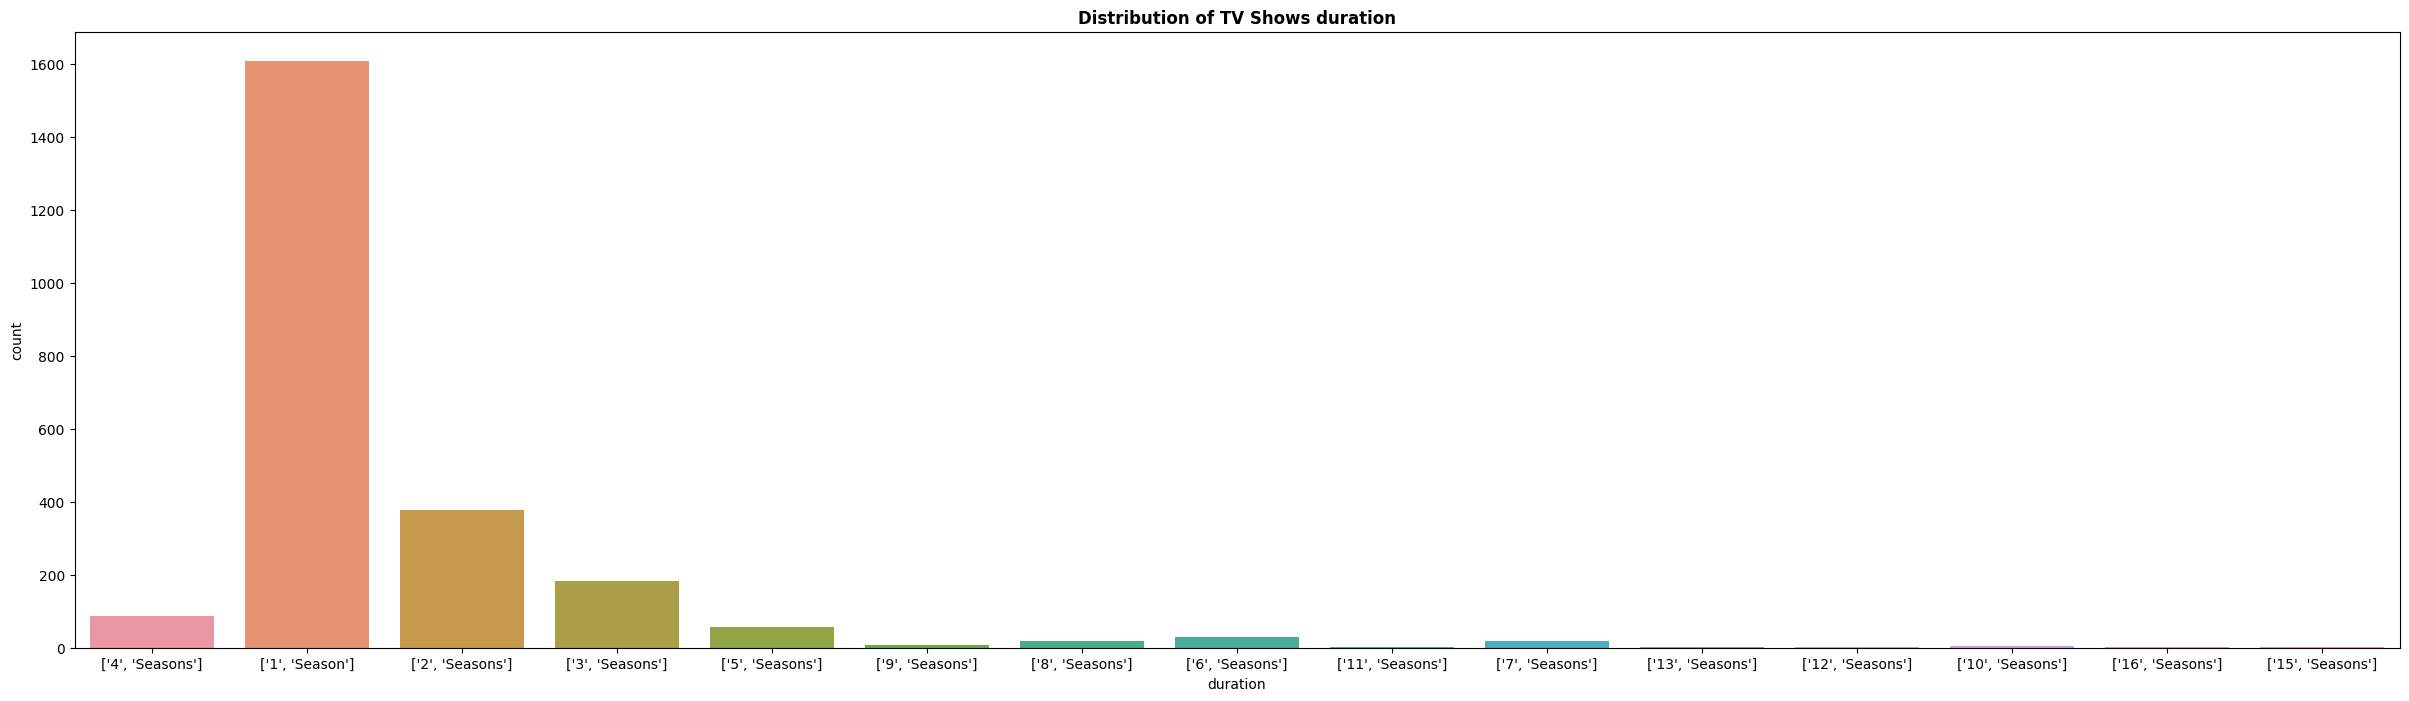

In [58]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,8))
plt.title("Distribution of TV Shows duration",fontweight='bold')
tv_shows['duration'] = tv_shows['duration'].apply(str)
sns.countplot(x=tv_shows['duration'])

highest number of tv_shows consisting of single season.

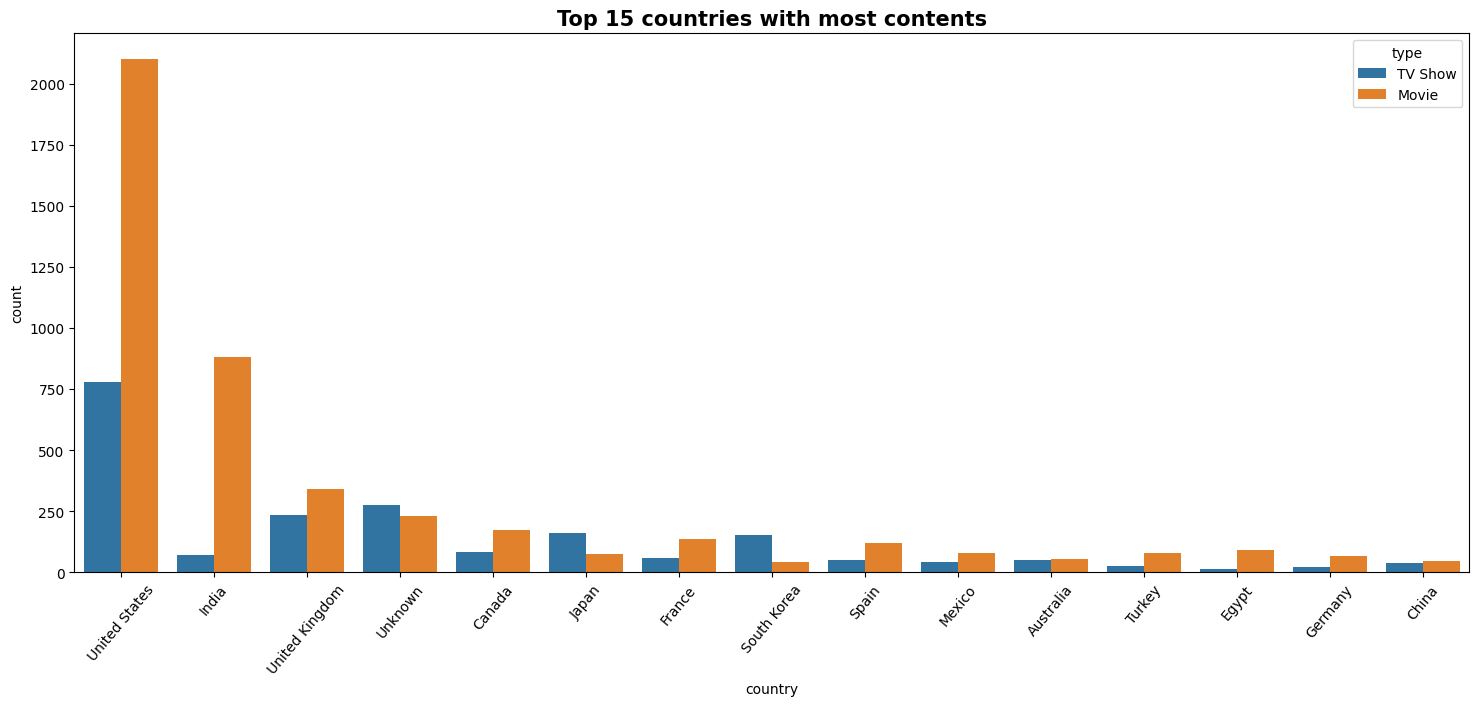

In [59]:
#Analysing top15 countries with most content
plt.figure(figsize=(18,7))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:15],hue=df['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

unitated states has the highest number of content on the netflix ,followed by india

([<matplotlib.patches.Wedge at 0x7b8604edc430>,
 [Text(-0.8902585632950727, -0.6460957285726268, 'Others'),
  Text(0.9711911599582614, 0.7048317038974106, 'Originals')],
 [Text(-0.4855955799791305, -0.3524158519487055, '69.98%'),
  Text(0.5665281766423191, 0.4111518272734894, '30.02%')])

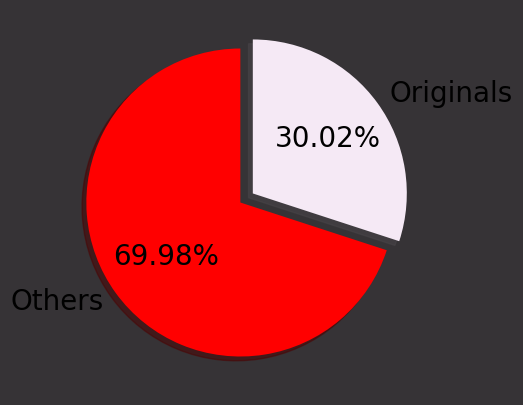

In [60]:
movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

30.02% movies released on Netflix, and 69.98% movies added on Netflix were released earlier by different mode.

In [61]:
#top_two countries where netflix is most popular
country=df['country'].value_counts().reset_index()
country

index  country
0    United States     2877
1            India      956
2   United Kingdom      576
3          Unknown      506
4           Canada      259
..             ...      ...
77        Zimbabwe        1
78         Namibia        1
79    Soviet Union        1
80            Iran        1
81         Somalia        1

[82 rows x 2 columns]

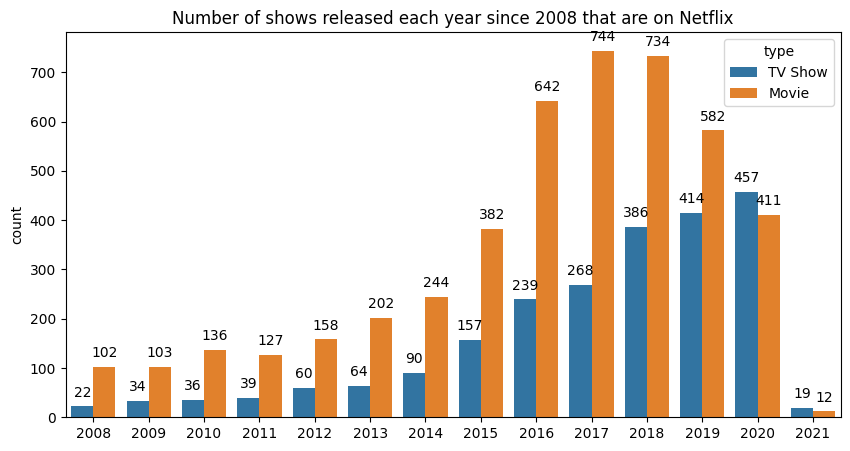

In [62]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [63]:
NF_df['duration'] = NF_df['duration'].astype(str)

Text(0.5, 1.0, 'Top 10 genres for movies')

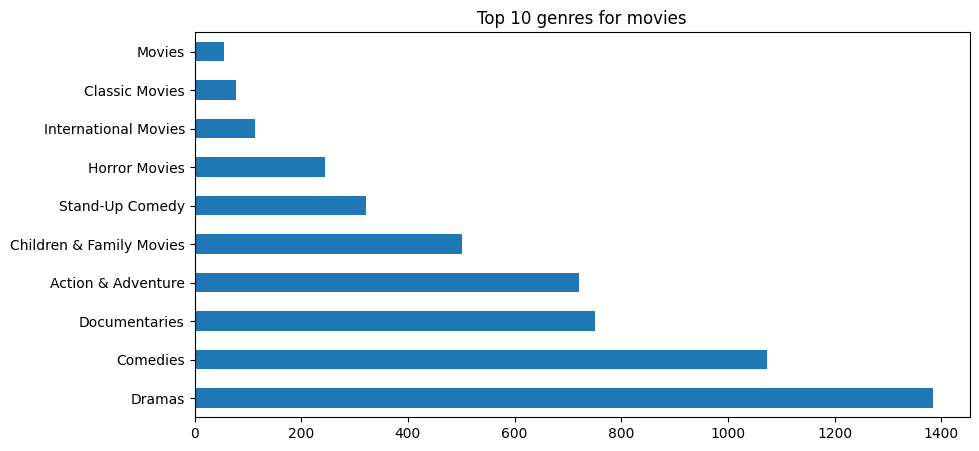

In [64]:
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

Dramas,Comedies and Documentaries are the top most genre in netflix international movies.

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

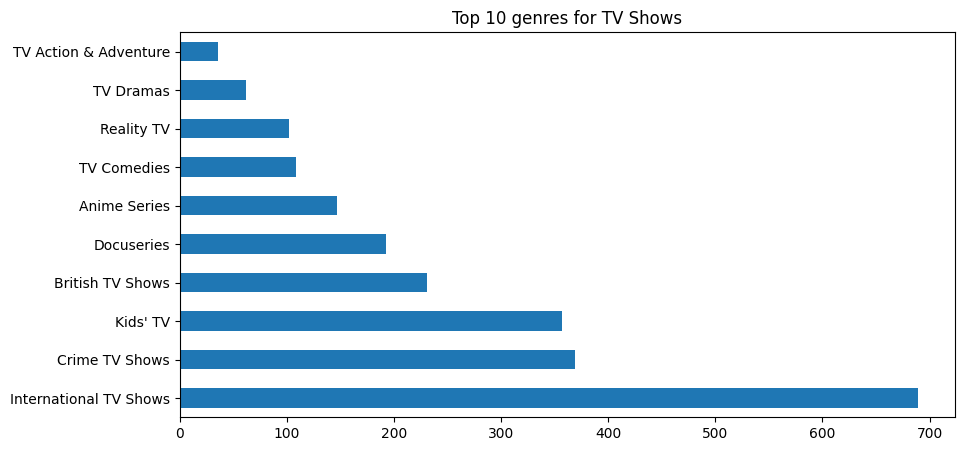

In [65]:
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')

International tv show is the top most TV show genre in netflix.

Text(0.5, 1.0, 'Top 10 movie directors')

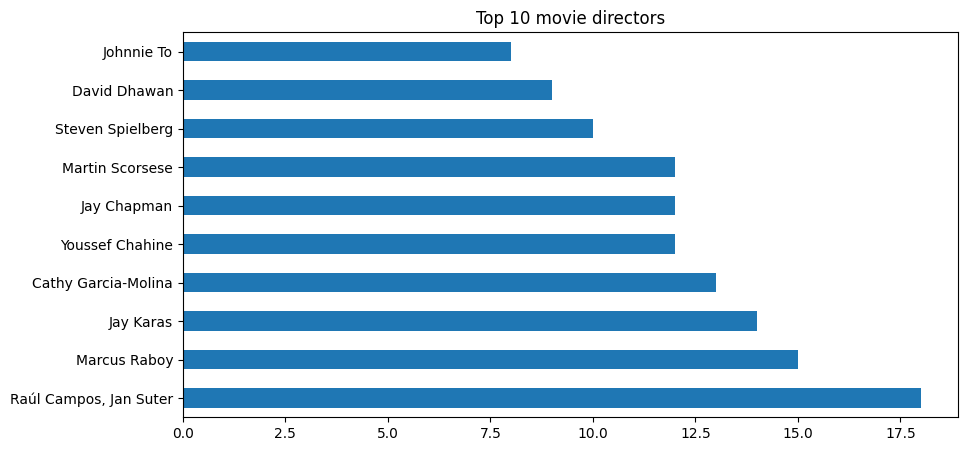

In [66]:
# Top 10 movie directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

Text(0.5, 1.0, 'Top 10 TV show directors')

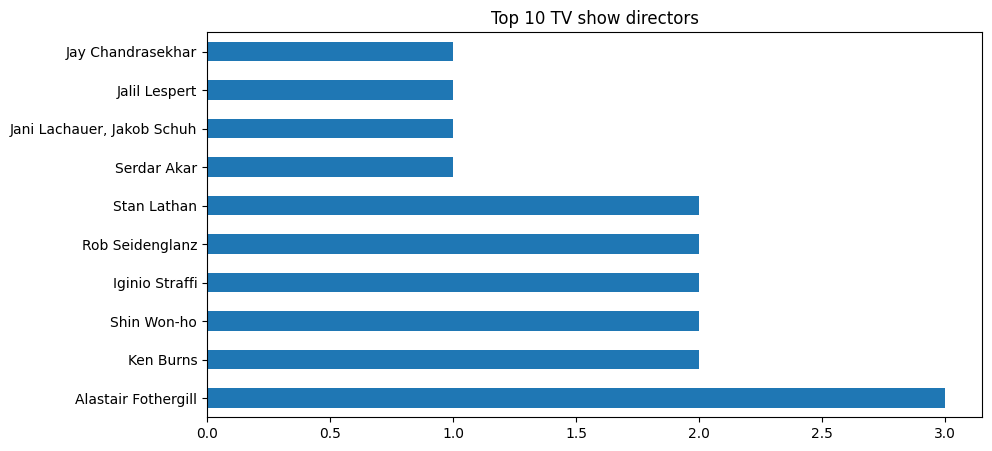

In [67]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

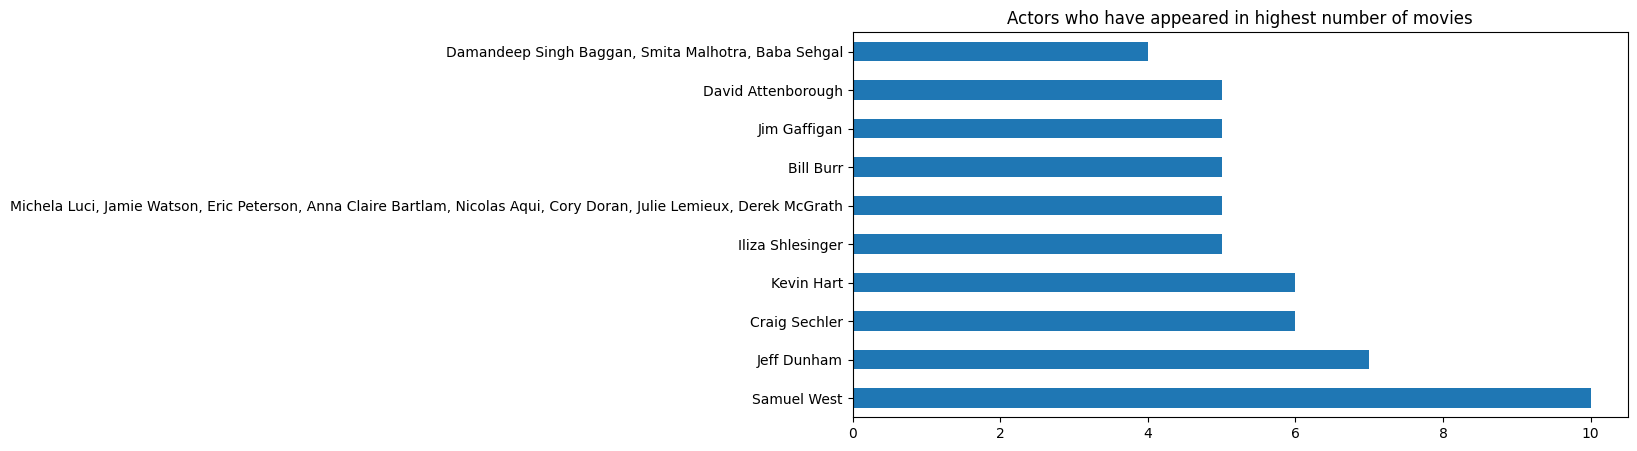

In [68]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

Samuel West was appeared in most of the movies.

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

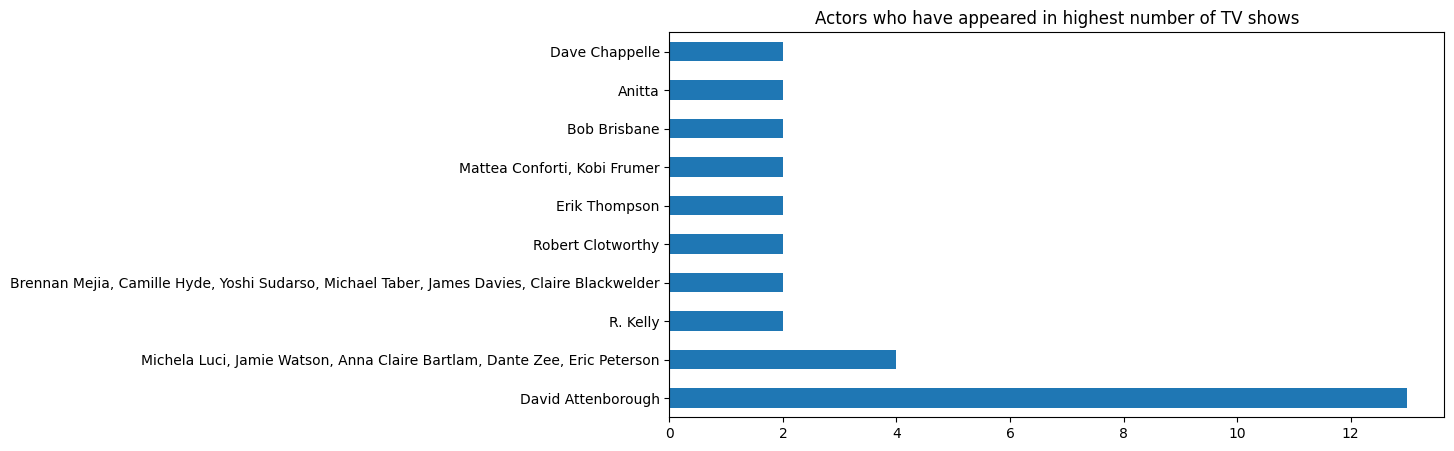

In [69]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

David Attenborough was appeared in most of the tv shows.

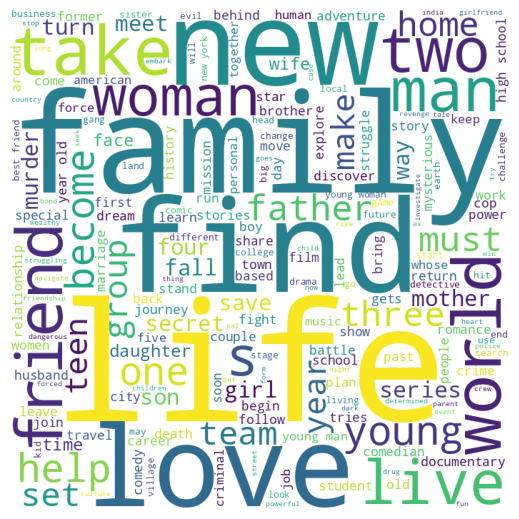

In [70]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

##### 2. What is/are the insight(s) found from the chart?

Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the document(s).

Some keywords in Netflix shows: life,family,friend,women,live,love,young,group,death,world,new,murder,mother,father,son,girl,secret.

# Making some hypothesis

HO:netflix has more movies than tv shows H1:netflix not have more movies than TV SHOWS

In [71]:
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

In [72]:
movies

show_id   type                                    title  \
1         s2  Movie                                     7:19   
2         s3  Movie                                    23:59   
3         s4  Movie                                        9   
4         s5  Movie                                       21   
6         s7  Movie                                      122   
...      ...    ...                                      ...   
7781   s7782  Movie                                     Zoom   
7782   s7783  Movie                                     Zozo   
7783   s7784  Movie                                   Zubaan   
7784   s7785  Movie                        Zulu Man in Japan   
7786   s7787  Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
6       Yasir Al Yasiri  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   
...                 ...                                                ...   
7781       Peter Hewitt  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784            Unknown                                            Nasty C   
7786           Sam Dunn                                            Unknown   

             country  release_year        rating    duration  \
1             Mexico          2016        Adults   [93, min]   
2          Singapore          2011        Adults   [78, min]   
3      United States          2009         Teens   [80, min]   
4      United States          2008         Teens  [123, min]   
6              Egypt          2019        Adults   [95, min]   
...              ...           ...           ...         ...   
7781   United States          2006    Older Kids   [88, min]   
7782          Sweden          2005        Adults   [99, min]   
7783           India          2015  Young Adults  [111, min]   
7784         Unknown          2019        Adults   [44, min]   
7786  United Kingdom          2019        Adults   [90, min]   

                     listed_in  \
1                       Dramas   
2                Horror Movies   
3           Action & Adventure   
4                       Dramas   
6                Horror Movies   
...                        ...   
7781  Children & Family Movies   
7782                    Dramas   
7783                    Dramas   
7784             Documentaries   
7786             Documentaries   

                                            description  month_added  \
1     After a devastating earthquake hits Mexico Cit...           12   
2     When an army recruit is found dead, his fellow...           12   
3     In a postapocalyptic world, rag-doll robots hi...           11   
4     A brilliant group of students become card-coun...            1   
6     After an awful accident, a couple admitted to ...            6   
...                                                 ...          ...   
7781  Dragged from civilian life, a former superhero...            1   
7782  When Lebanon's Civil War deprives Zozo of his ...           10   
7783  A scrappy but poor boy worms his way into a ty...            3   
7784  In this documentary, South African rapper Nast...            9   
7786  This documentary delves into the mystique behi...            3   

      year_added originals  
1           2016       Yes  
2           2018        No  
3           2017        No  
4           2020        No  
6           2020        No  
...          ...       ...  
7781        2020        No  
7782        2020        

In [73]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

In [74]:
np.mean(movies)

release_year    2012.920030
month_added        6.712479
year_added      2018.479821
dtype: float64

In [75]:
movies.duration

1        [93, min]
2        [78, min]
3        [80, min]
4       [123, min]
6        [95, min]
           ...    
7781     [88, min]
7782     [99, min]
7783    [111, min]
7784     [44, min]
7786     [90, min]
Name: duration, Length: 5377, dtype: object

In [76]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year  rating      duration               listed_in  \
0          2020  Adults  [4, Seasons]  International TV Shows   
1          2016  Adults     [93, min]                  Dramas   
2          2011  Adults     [78, min]           Horror Movies   
3          2009   Teens     [80, min]      Action & Adventure   
4          2008   Teens    [123, min]                  Dramas   

                                         description  month_added  year_added  
0  In a future where the elite inhabit an island ...            8        2020  
1  After a devastating earthquake hits Mexico Cit...           12        2016  
2  When an army recruit is found dead, his fellow...           12        2018  
3  In a postapocalyptic world, rag-doll robots hi...           11        2017  
4  A brilliant group of students become card-coun...            1        2020

In [77]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [78]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [79]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   

   release_year  rating  duration           listed_in  \
1          2016  Adults       NaN              Dramas   
2          2011  Adults       NaN       Horror Movies   
3          2009   Teens       NaN  Action & Adventure   

                                         description  month_added  year_added  \
1  After a devastating earthquake hits Mexico Cit...           12        2016   
2  When an army recruit is found dead, his fellow...           12        2018   
3  In a postapocalyptic world, rag-doll robots hi...           11        2017   

  target_ages  
1      Adults  
2      Adults  
3       Teens

In [80]:
#group_by duration and target_ages
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

target_ages  duration
0        Kids       NaN
1  Older Kids       NaN
2       Teens       NaN
3      Adults       NaN

In [81]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration   NaN
dtype: float64 
 Mean for  movies rated for older kids duration   NaN
dtype: float64
Std for  movies rated for Older Kids duration   NaN
dtype: float64 
 Std for  movies rated for kids duration   NaN
dtype: float64


In [82]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(M1, M2)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

nan
accept null hypothesis


In [83]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration   NaN
dtype: float64
SP duration   NaN
dtype: float64
tvalue nan


In [84]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [85]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, movies rated for kids and older kids are not at least two hours long.

In [86]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year  rating      duration               listed_in  \
0          2020  Adults  [4, Seasons]  International TV Shows   
1          2016  Adults     [93, min]                  Dramas   
2          2011  Adults     [78, min]           Horror Movies   
3          2009   Teens     [80, min]      Action & Adventure   
4          2008   Teens    [123, min]                  Dramas   

                                         description  month_added  year_added  
0  In a future where the elite inhabit an island ...            8        2020  
1  After a devastating earthquake hits Mexico Cit...           12        2016  
2  When an army recruit is found dead, his fellow...           12        2018  
3  In a postapocalyptic world, rag-doll robots hi...           11        2017  
4  A brilliant group of students become card-coun...            1        2020

In [87]:
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_

In [88]:
#Another category is target_ages (4 classes).
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country  release_year  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil          2020   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico          2016   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore          2011   

   rating  duration               listed_in  \
0  Adults       NaN  International TV Shows   
1  Adults       NaN                  Dramas   
2  Adults       NaN           Horror Movies   

                                         description  month_added  year_added  
0  In a future where the elite inhabit an island ...            8        2020  
1  After a devastating earthquake hits Mexico Cit...           12        2016  
2  When an army recruit is found dead, his fellow...           12        2018

In [89]:
#group_by duration and target_ages
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

type  duration
0    Movie       NaN
1  TV Show       NaN

In [90]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration   NaN
dtype: float64 
 Mean for  movies rated for older kids duration   NaN
dtype: float64
Std for  movies rated for Older Kids duration   NaN
dtype: float64 
 Std for  movies rated for kids duration   NaN
dtype: float64


In [91]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5377 2400
dof 7775
SP_2 = duration   NaN
dtype: float64
SP duration   NaN
dtype: float64
tvalue nan


In [92]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602691465072455

In [93]:
#t-distribution
stats.t.ppf(0.975,dof)

1.960269146507245

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, The duration which is more than 90 mins are movies

###***Data preprocessing***

**Modelling Approach:**

Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase.

Lemmatization to generate a meaningful word out of corpus of words

Tokenization of corpus

Word vectorization

Dimensionality reduction

Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques

Build optimal number of clusters and visualize the contents of each cluster using wordclouds.

We will cluster the shows on Netflix based on the following attributes:

Director

Cast

Country

Listed in (genres)

Description

In [94]:
# Using the original dataset for clustering since
# it does not require handling missing values
df = NF_df.copy()

In [95]:
df.fillna('',inplace=True)

In [96]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [97]:
# Combining all the clustering attributes into a single column

df['clustering_attributes'] = ( df['director'] +' ' +
                                df['cast'] +' ' +
                                df['country'] +' ' +
                                df['listed_in'] +' ' +
                                df['description'])

In [98]:
df['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

###***Removing non-ASCII characters***

```
# This is formatted as code
```



In [99]:
## function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [100]:
# remove non-ascii characters
df['clustering_attributes'] = remove_non_ascii(df['clustering_attributes'])


In [101]:
df['clustering_attributes'][40]

'Muharrem Gulmez Erdem Yener, Ayhan Tas, Emin Olcay, Muharrem Gulmez, Elif Nur Kerkuk, Tark Papuccuoglu, Suzan Aksoy, Doga Konakoglu, Esin Eden, Deniz Ozerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

We have successfully removed all non-ascii characters from the corpus.


####***Remove stopwords and lower case***

In [102]:
# extracting the stopwords from nltk library

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

np.array(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array({'a', 'by', 'doing', 'both', 'in', 'ourselves', "haven't", "should've", 'while', 'out', 've', 'between', "needn't", 'wasn', 'through', 't', 'few', 'very', 'only', "mightn't", 'further', 'against', 'the', 'were', 'of', 'them', 'our', "she's", 'been', 'needn', 'why', 'i', "that'll", 'each', 'which', 'after', 'mustn', 'but', 'be', 's', 'hasn', "won't", 'yourselves', 'from', 'myself', 'her', 'your', 'down', 'was', 'himself', "mustn't", 'over', 'couldn', 'shan', 'd', 'there', 'when', 'with', 'these', 'my', 'their', 'hers', 'being', 'during', 'mightn', "shouldn't", "weren't", 'o', "couldn't", 'or', 'had', 'me', 'once', 'y', 'on', 'hadn', "isn't", 'can', 'for', 'about', 'ma', 'yourself', 'him', "didn't", 'shouldn', "wouldn't", 'who', "hasn't", 'up', 'they', 'weren', 'just', 'no', 'now', 'above', 'themselves', 'all', 'haven', 'ain', 'll', "you're", 'm', 'own', 'than', 'other', 'too', 'didn', 'any', 'same', 'not', 'here', "shan't", 'theirs', 'yours', 'are', 'have', 'she', 'whom', "it's", 

In [103]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [104]:
# function to remove stop words
def remove_stopwords(text):

    # Tokenize the input text into words
    words = text.split()

    # Remove stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Reconstruct the text without stopwords
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

In [105]:
# Removing stop words
df['clustering_attributes'] = df['clustering_attributes'].apply(stopwords)

In [106]:
df['clustering_attributes'][40]

'muharrem gulmez erdem yener, ayhan tas, emin olcay, muharrem gulmez, elif nur kerkuk, tark papuccuoglu, suzan aksoy, doga konakoglu, esin eden, deniz ozerman turkey comedies, international movies slacker owner public bath house rallies community save big developer comes town close open new mall.'

We have successfully removed all the stopwords and converted the corpus to lowercase.


## ***Remove punctuations***

In [107]:
# function to remove punctuations

def remove_punctuation(text):
    # Define a translation table that maps punctuation characters to None
    translator = str.maketrans('', '', string.punctuation)

    # Use the translation table to remove punctuation
    text_without_punctuation = text.translate(translator)

    return text_without_punctuation

In [108]:
# Removing punctuation marks
df['clustering_attributes'] = df['clustering_attributes'].apply(remove_punctuation)

In [109]:
df['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

We have successfully dropped all the punctuation marks from the corpus.


## ***Lemmatization***

In [110]:
nltk.download('punkt')

def lemmatize_corpus(corpus):
    lemmatizer = WordNetLemmatizer()
    lemmatized_corpus = []

    for text in corpus:
        # Tokenize the text into words or tokens
        words = nltk.word_tokenize(text)

        # Lemmatize each word and join them back into a sentence
        lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in words])

        lemmatized_corpus.append(lemmatized_text)

    return lemmatized_corpus

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [111]:
#Lemmatization
df['clustering_attributes'] =  lemmatize_corpus(df['clustering_attributes'])

In [112]:
df['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan ta emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedy international movie slacker owner public bath house rally community save big developer come town close open new mall'

###***Tokenization***

In [113]:
tokenizer = TweetTokenizer()

In [114]:
df['clustering_attributes'] = df['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

In [115]:
df['clustering_attributes'][40]

['muharrem',
 'gulmez',
 'erdem',
 'yener',
 'ayhan',
 'ta',
 'emin',
 'olcay',
 'muharrem',
 'gulmez',
 'elif',
 'nur',
 'kerkuk',
 'tark',
 'papuccuoglu',
 'suzan',
 'aksoy',
 'doga',
 'konakoglu',
 'esin',
 'eden',
 'deniz',
 'ozerman',
 'turkey',
 'comedy',
 'international',
 'movie',
 'slacker',
 'owner',
 'public',
 'bath',
 'house',
 'rally',
 'community',
 'save',
 'big',
 'developer',
 'come',
 'town',
 'close',
 'open',
 'new',
 'mall']

The corpus is converted to tokens.


###***Vectorization***

We can vectorize the corpus using TFIDF vectorizer, where TFIDF stands for - Term Frequency Inverse Document Frequency.

TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)


IDF(t) = log((Total number of documents in the corpus) / (Number of documents containing term t))

TF-IDF(t, d) = TF(t, d) * IDF(t)

In [116]:
# clustering tokens saved in a variable
clustering_data = df['clustering_attributes']

In [117]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
x= tfidf.fit_transform(clustering_data)

In [118]:
# Shape of X
x.shape


(7787, 20000)

In [119]:
# data type of vector
type(x)

scipy.sparse._csr.csr_matrix

In [120]:
from sklearn.cluster import KMeans
# convert X into array form for clustering
X= x.toarray()


In [121]:
#check the matrix
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

###***Dimensionality reduction using PCA***

Principal Component Analysis (PCA) is a widely used technique for dimensionality reduction in data analysis and machine learning.


In [122]:
from sklearn.decomposition import PCA

In [123]:
# using PCA to reduce dimensionality
pca = PCA(random_state=20)
pca.fit(X)

PCA(random_state=20)

Text(0, 0.5, 'cumulative explained variance')

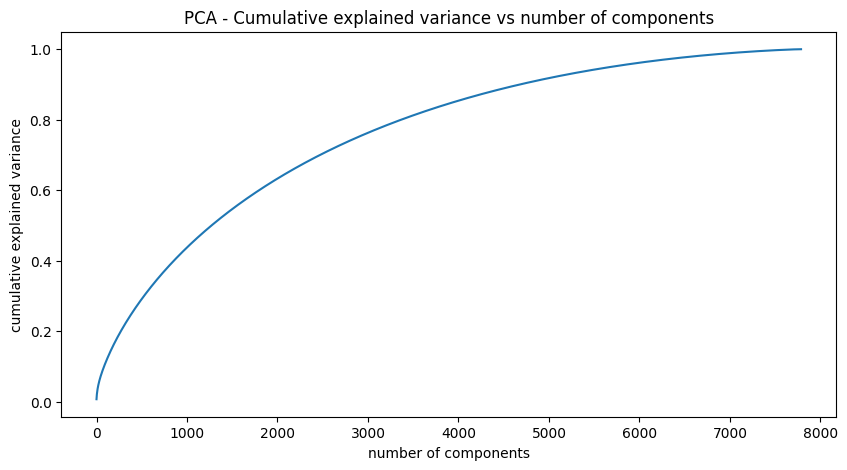

In [124]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

We find that 100% of the variance is explained by about ~7500 components.

Also, more than 80% of the variance is explained just by 4000 components.

Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [125]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=100,random_state=40)
pca.fit(X)

PCA(n_components=100, random_state=40)

In [126]:
# transformed features
x_pca = pca.transform(X)

In [127]:
# shape of transformed vectors
x_pca.shape

(7787, 100)

####***Clusters implementation***

####***K-Means Clustering***

Building clusters using the K-means clustering algorithm.

Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.



Text(0, 0.5, 'WCSS')

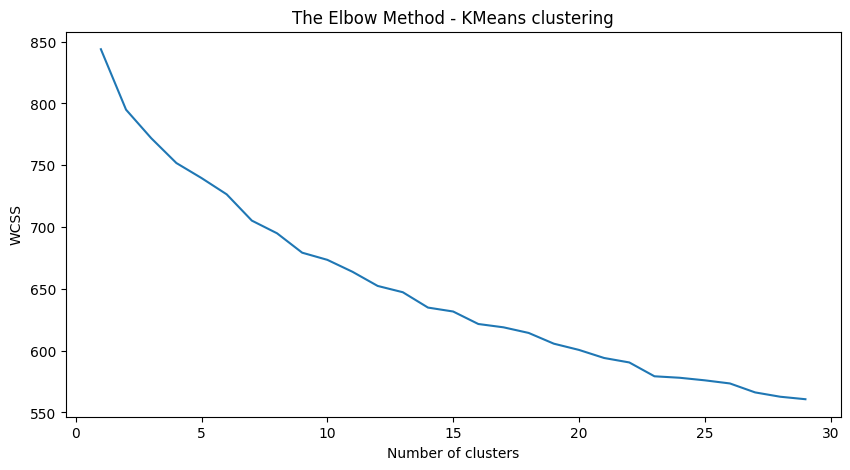

In [128]:
from sklearn.cluster import KMeans

# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,30):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,30)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters.

In [129]:
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
#sillhoute score of clusters
sill = []
for i in range(2,12):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0050
cluster: 3 	 Sillhoute: 0.0057
cluster: 4 	 Sillhoute: 0.0064
cluster: 5 	 Sillhoute: 0.0072
cluster: 6 	 Sillhoute: 0.0074
cluster: 7 	 Sillhoute: 0.0058
cluster: 8 	 Sillhoute: 0.0062
cluster: 9 	 Sillhoute: 0.0062
cluster: 10 	 Sillhoute: 0.0066
cluster: 11 	 Sillhoute: 0.0068


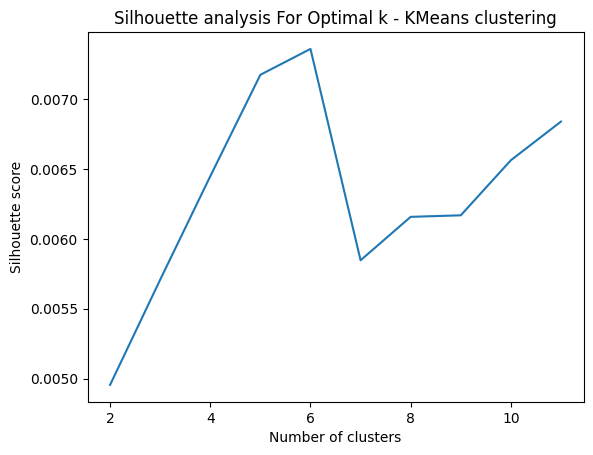

In [130]:
plt.plot(range(2,12), sill)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

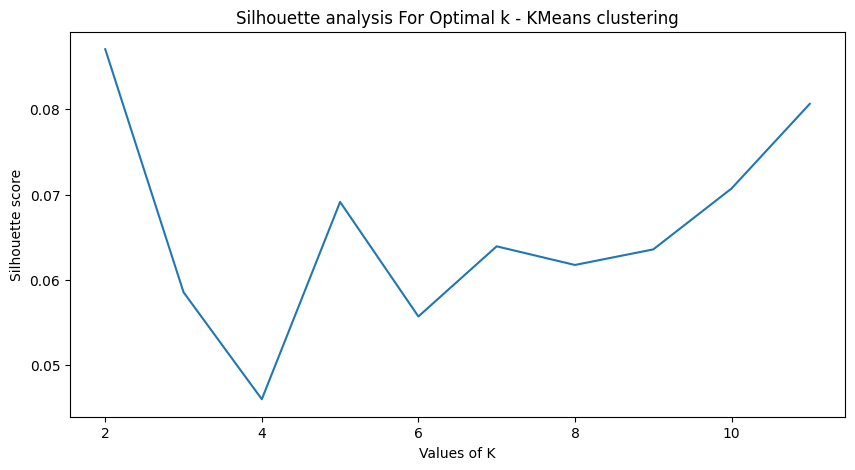

In [131]:
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(2,12)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

**The highest Silhouette score is obtained for 6 clusters.**

Building 6 clusters using the k-means clustering algorithm:

In [132]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=33)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=33)

In [133]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(726.4471219742086, 0.05568456643754378)


In [134]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

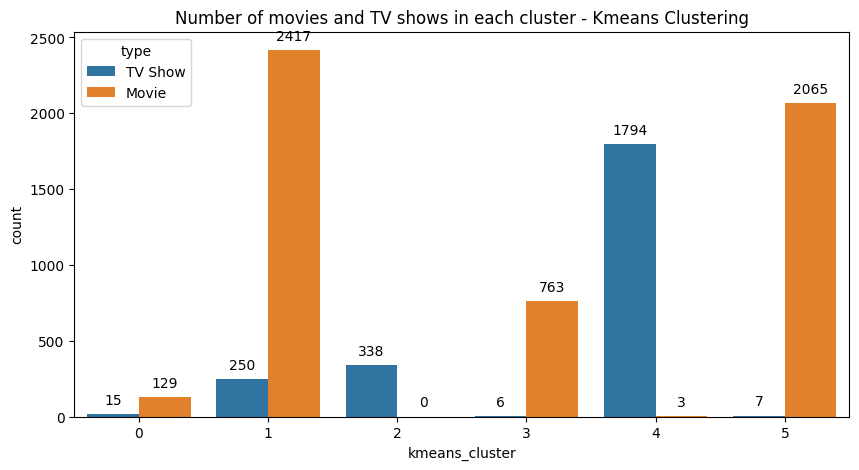

In [135]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [136]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['kmeans_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

          comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()

**Successfully built 6 clusters using the k-means clustering algorithm.**

**Building wordclouds for different clusters built**

In [137]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['kmeans_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

            # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)



In [138]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def kmeans_wordcloud(cluster_num, df):
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in df[df['kmeans_cluster'] == cluster_num].description.values:
        # typecast each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens) + " "

    wordcloud = WordCloud(width=700, height=700,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size=10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize=(10, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

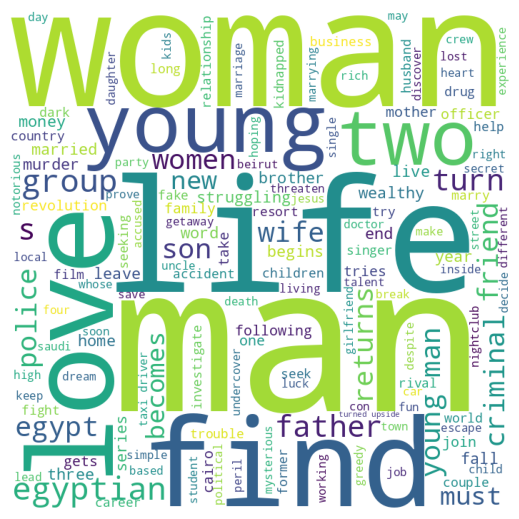

In [139]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)

**Keywords observed in cluster 0: life, new, family, friend, save, help, discover, home, teen.**

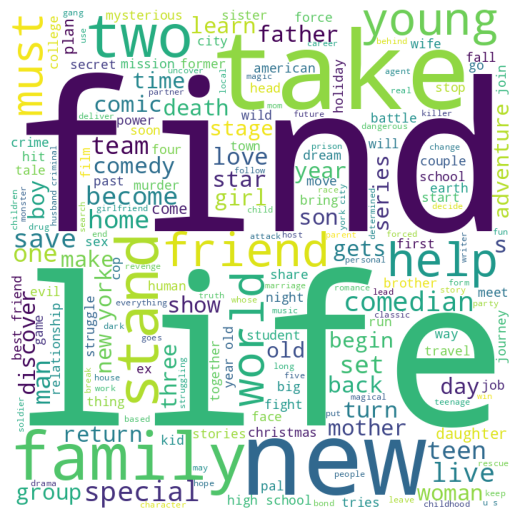

In [140]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

**Keywords observed in cluster 1: life, love, family, father, young, girl, man, woman, friend, daughter.**

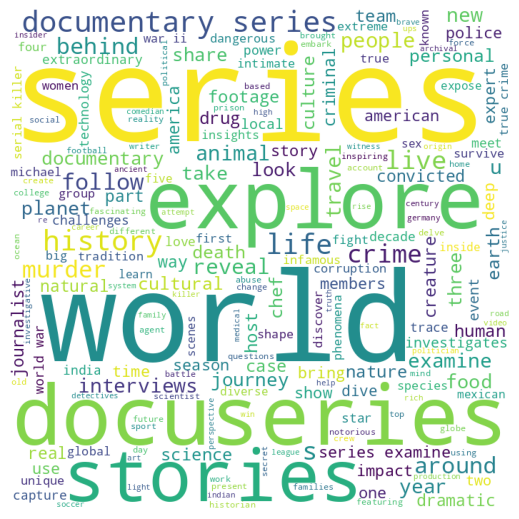

In [141]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

**Keywords observed in cluster 2: young, world, girl, mysterious, humanity, life, student, school, battle, demon, force.**

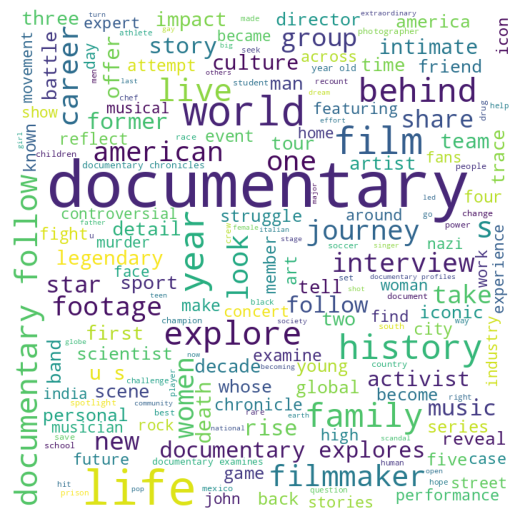

In [142]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

**Keywords observed in cluster 3: love, life, family, romance, crime, murder, world, adventure.**

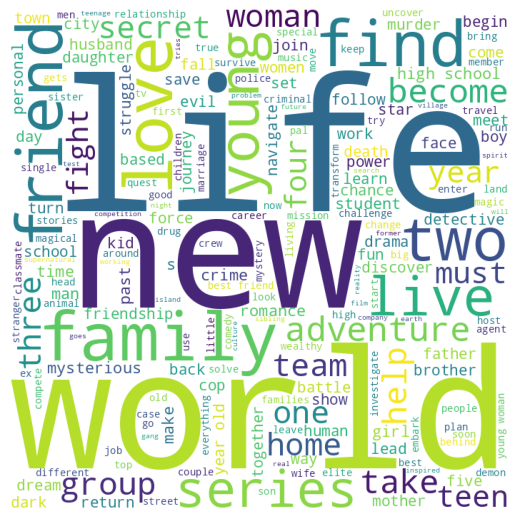

In [143]:
# Wordcloud for cluster 4
kmeans_worldcloud(4)

**Keywords observed in cluster 4: comedian, special, stand, comic, stage, sex, joke.**

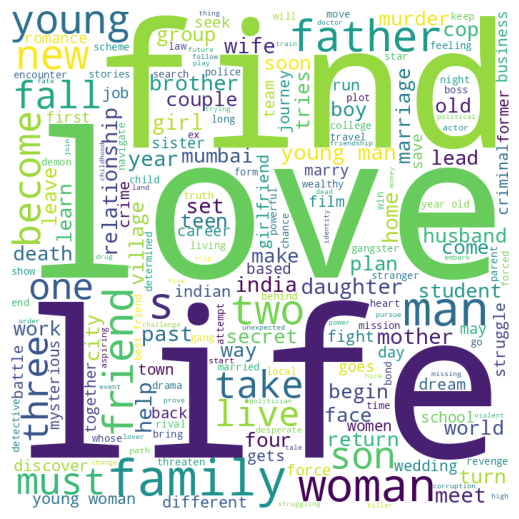

In [144]:
# Wordcloud for cluster 5
kmeans_worldcloud(5)

**Keywords observed in cluster 5: documentary, world, life, filmmaker, american, life.**

####***Hierarchical clustering***

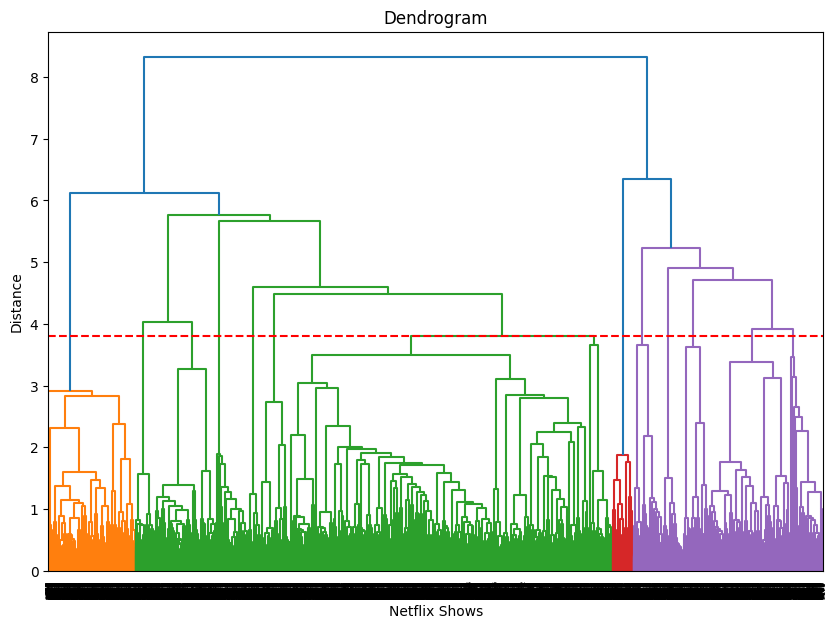

In [145]:
# Building a dendogram to decide on the number of clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

At a distance of 3.8 units, 12 clusters can be built using the agglomerative clustering algorithm.

In [146]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(x_pca)

array([ 1, 10,  1, ...,  1,  1, 11])

In [147]:
# Adding a kmeans cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

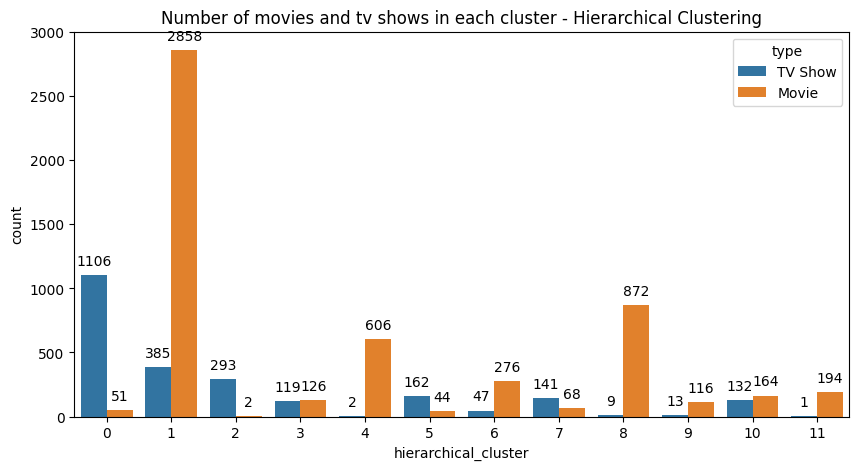

In [148]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

####***Building wordclouds for different clusters built***

In [149]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['hierarchical_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

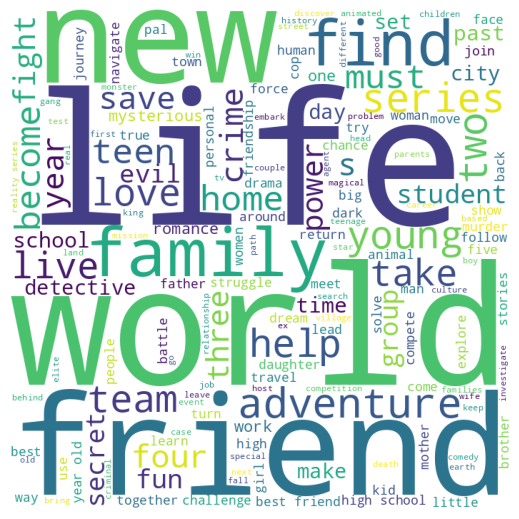

In [150]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

Keywords observed in cluster 0: life, new, find, family, save, friend, young, teen, adventure.

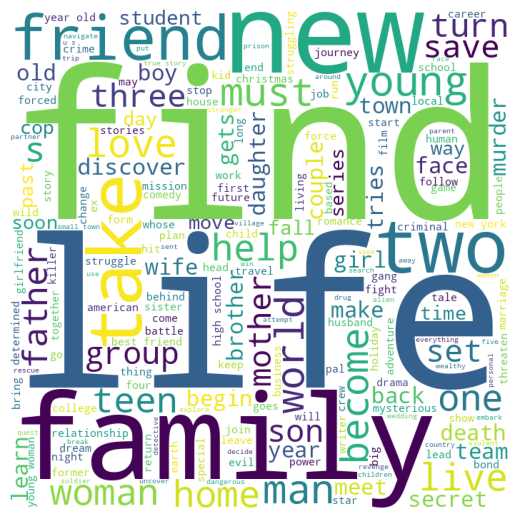

In [151]:
#Wordcloud for cluster 1
hierarchical_worldcloud(1)

Keywords observed in cluster 1: love, family, life, student, romance, school, woman, master, father.

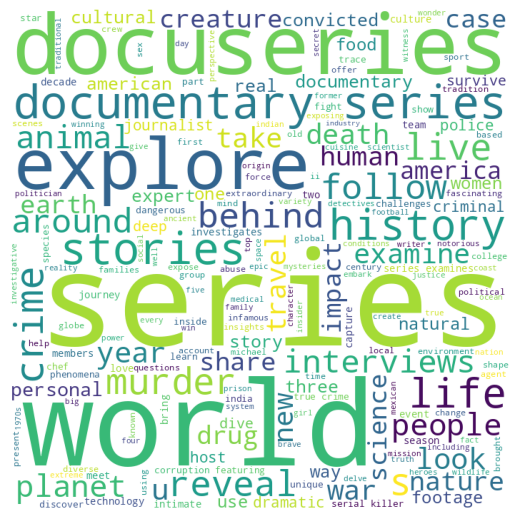

In [152]:
# Wordcloud for cluster 2
hierarchical_worldcloud(2)

Keywords observed in cluster 2: life, new, series, crime, world, murder, history, detective.

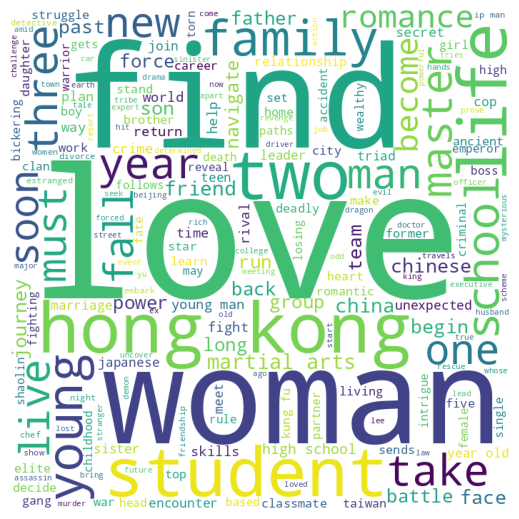

In [153]:
# Wordcloud for cluster 3
hierarchical_worldcloud(3)

Keywords observed in cluster 3: family, life, love, friend, teen, woman, man, young, world, wedding, secret.

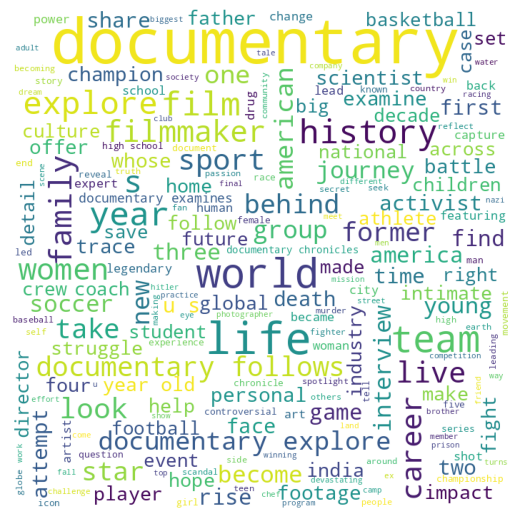

In [154]:
# Wordcloud for cluster 4
hierarchical_worldcloud(4)

Keywords observed in cluster 4: documentary, music, world, team, interview,history, family, career, battle, death.

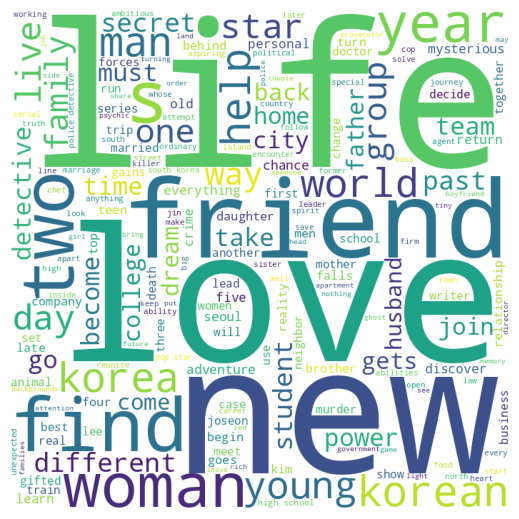

In [155]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

Keywords observed in cluster 5: family, life, mexico, young, new, woman, man, secret, spain, death, singer.

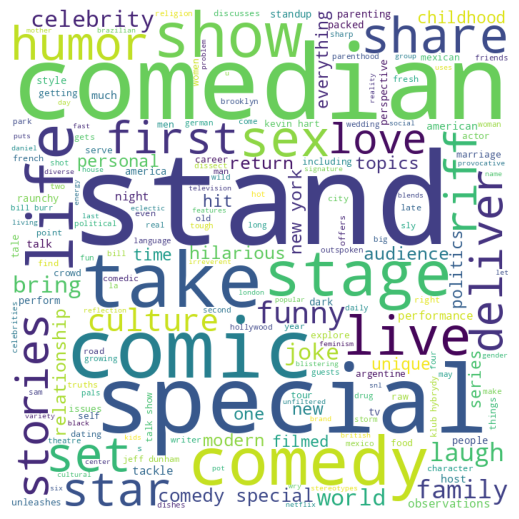

In [156]:
# Wordcloud for cluster 6
hierarchical_worldcloud(6)

Keywords observed in cluster 6: young, life, girl, world, friend, mysterious, demon, student, school, father.

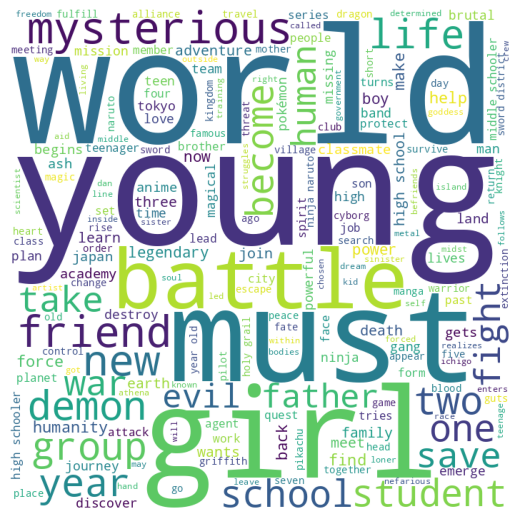

In [157]:
# Wordcloud for cluster 7
hierarchical_worldcloud(7)

Keywords observed in cluster 7: love, life, woman, new, student, family, korea, secret, detective, young.

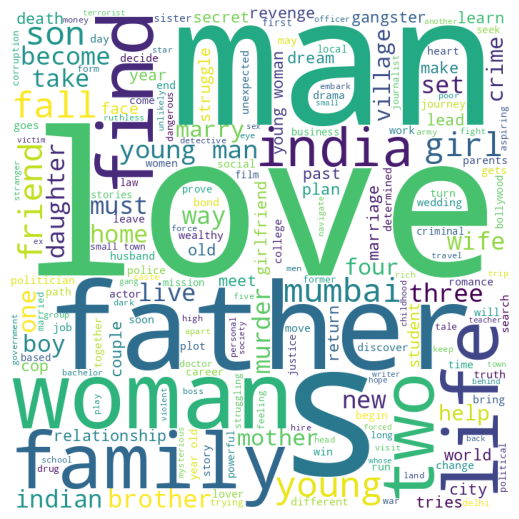

In [158]:
# Wordcloud for cluster 8
hierarchical_worldcloud(8)

Keywords observed in cluster 8: woman, man life, egypt, wealthy, money, young, love, revolution, struggling.

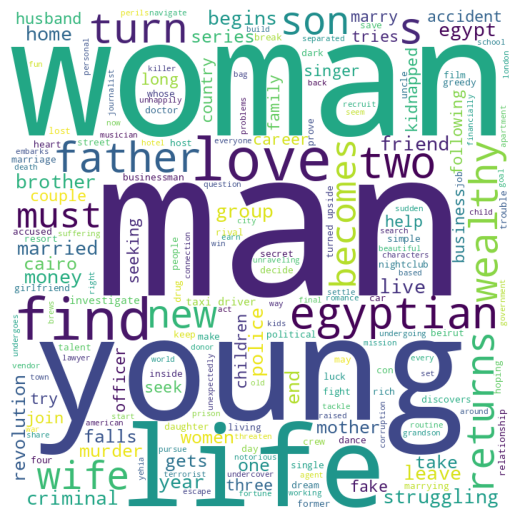

In [159]:
# Wordcloud for cluster 9
hierarchical_worldcloud(9)

Keywords observed in cluster 9: comedian, stand, life, comic, special, show, live, star, stage, hilarious, stories.

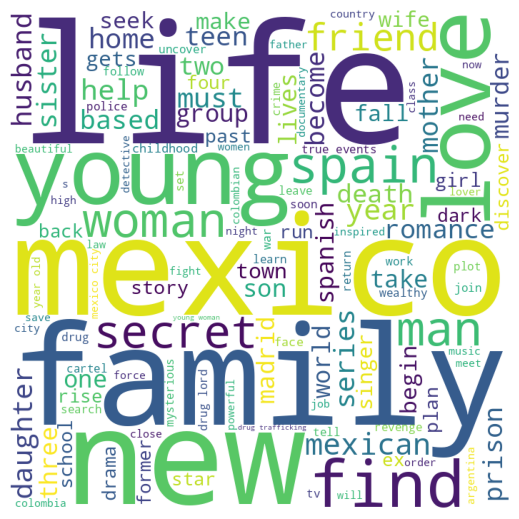

In [160]:
# Wordcloud for cluster 10
hierarchical_worldcloud(10)

Keywords observed in cluster 10: animal, nature, explore, planet, species, survive, natural, life, examine, earth.

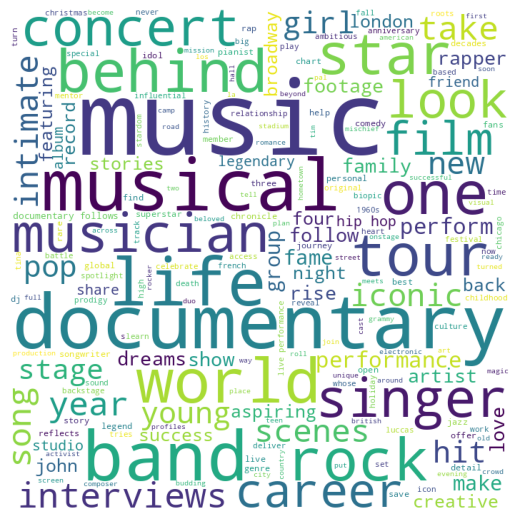

In [161]:
# Wordcloud for cluster 11
hierarchical_worldcloud(11)

Keywords observed in cluster 11: love, man, woman, india, father, friend, girl, mumbai, city, learn, young.

###***Content based recommender system***


We can build a simple content based recommender system based on the similarity of the shows.
If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.
To get the similarity score of the shows, we can use cosine similarity
The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value as shown in the equation below. We can simply say that the CS score of two vectors increases as the angle between them decreases.

            cos(θ) = (A · B) / (|A|*|B|)

In [162]:
# defining a new df for building a recommender system
recommender_df = df.copy()

In [163]:
# Changing the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index

In [164]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

recommender_df['clustering_attributes'] = recommender_df['clustering_attributes'].apply(lambda x: convert(x))

In [165]:
# setting title of movies/Tv shows as index
recommender_df.set_index('title',inplace=True)

In [166]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['clustering_attributes'])

In [167]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [168]:
cosine_similarity.shape

(7787, 7787)

In [169]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [170]:
# Recommendations for 'A Man Called God'
recommend_10('A Man Called God')

If you liked 'A Man Called God', you may also enjoy:



['One Spring Night',
 'Mr. Sunshine',
 'Rugal',
 'My Little Baby',
 'The King: Eternal Monarch',
 'Busted!',
 'The Lies Within',
 'My Mister',
 'My Only Love Song',
 'Live']

In [171]:
# Recommendations for 'Stranger Things'
recommend_10('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'The Umbrella Academy',
 'Nightflyers',
 'Prank Encounters',
 'Anjaan: Special Crimes Unit',
 'Warrior Nun',
 'Scream',
 'The Sinner',
 'Haunted',
 'Kiss Me First']

In [172]:
# Recommendations for 'Peaky Blinders'
recommend_10('Peaky Blinders')

If you liked 'Peaky Blinders', you may also enjoy:



['Kiss Me First',
 'Glow Up',
 'I AM A KILLER',
 'London Spy',
 'Happy Valley',
 'The Frankenstein Chronicles',
 'Paranoid',
 'Big Dreams, Small Spaces',
 'Inside the World’s Toughest Prisons',
 'Encounters with Evil']

In [173]:
# Recommendations for 'Lucifer'
recommend_10('Lucifer')

If you liked 'Lucifer', you may also enjoy:



['Rica, Famosa, Latina',
 'Get Shorty',
 'The Good Cop',
 'L.A.’s Finest',
 'Dramaworld',
 'The Expanding Universe of Ashley Garcia',
 'Better Call Saul',
 'Person of Interest',
 'Love',
 'Jack Taylor']

# **Conclusion**

*In this project, we worked on a text clustering problem where in we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

*The dataset contained about 7787 records, and 11 attributes.
We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

*It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.

*It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

*Through TFIDF Vectorization, we created a total of 20000 attributes.
We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.
We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.

*Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.

*A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***